<IPython.core.display.Javascript object>


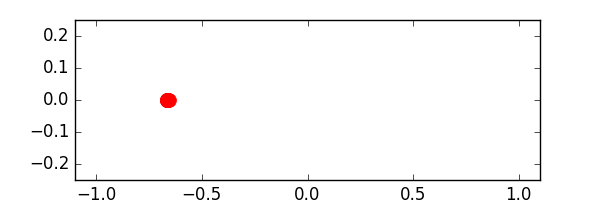

In [129]:
%matplotlib notebook
from PyDSTool import *
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
import numpy.random as random

kuramotoDS=args()
##################################################################
###### Specify number of oscillators and strength of coupling here
##################################################################

num_oscillators=10
coupling_strength=0.01

#kuramotoDS.pars={'omega':1,'K':coupling_strength}
kuramotoDS.pars={}
for i in range(0,num_oscillators):
    kuramotoDS.pars[str('omega'+str(i))]=random.uniform(0,1)
kuramotoDS.pars['K']=coupling_strength
kuramotoDS.varspecs={'x[i]':'for(i,0,'+str(num_oscillators-2)+',omega'+str(i)+'+K*sum(j,0,'+str(num_oscillators-2)+',sin(x[j]-x[i])))',
                     'x'+str(num_oscillators-1):'omega'+str(num_oscillators-1)+'+K*sum(i,0,'+str(num_oscillators-1)+',sin(x[i]-x'+str(num_oscillators-1)+'))'}

kuramotoDS.tdata=[0,50*np.pi]
kuramotoDS.ics={}
varnamedict=[]

# This loop assigns random initial phases on the interval [0,2*pi]
for i in range(0,num_oscillators):
    varname=str('x'+str(i))
    varnamedict.append(varname)
    kuramotoDS.ics[varname]=random.uniform(0,2*np.pi)

kuramotoDS.name='KuramotoOscillator'

Kuramoto=Generator.Vode_ODEsystem(kuramotoDS)
traj=Kuramoto.compute('test')
pts=traj.sample(dt=0.1)
f,ax=plt.subplots(figsize=(6,2),dpi=100)
ax.set_xlim([-1.1,1.1])
ax.set_ylim([-0.25,0.25])
line,=ax.plot([],[],'r.',markersize=20)

Ox=[[]]
Oy=[[]]
time=list(pts['t'])
#for i in range(0,len(time)):
#    x_summ=[]
#    y_summ=[]
#    for name in varnamedict:
#        x_summ.append(np.cos(pts[name][i]))
#        y_summ.append(np.sin(pts[name][i]))
#    Oy.append(y_summ)
#    Ox.append(x_summ) 
for i in range(1,len(time)):
    x_summ=[]
    y_summ=[]
    for name in varnamedict:
        #x_summ.append([time[i]] for c in range(0,num_oscillators))
        x_summ.append(np.sin(pts[name][i]))
    y_summ=[0 for c in range(0,num_oscillators)]
    Oy.append(y_summ)
    Ox.append(x_summ) 
def animate(i):
    line.set_xdata(np.array(Ox[i]).T[:])
    line.set_ydata(np.array(Oy[i]).T[:])
    return line,
#def init(i):
#    line.set_data([],[])
#    return line,
ani1 = animation.FuncAnimation(f, animate, frames=np.arange(20,len(time)),interval=10)#,blit=True)
#theta=np.arange(0,2.1*(np.pi),0.1)
#plt.plot(np.cos(theta),np.sin(theta),'k', linestyle='dashed')
#ani1.save('./kuramoto_N15_K009.png',writer='imagemagick')
plt.show()


In [3]:
x=1
length=10
y=[x for i in range(0,length)]
print y

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [100]:
cols=['r','g','b']
X=np.array(Ox[1:-1])
Y=np.array(Oy[1:-1])
for i in range(0,3):
    plt.plot(X.T[i],Y.T[i],cols[i])
plt.show()

In [60]:
Ox[2][1]

1.0000613273030474

In [111]:
np.array(Oy[1:i]).T[:]

array([[-0.9996005 , -0.91564687, -0.65574161, -0.26982843,  0.16357683,
         0.56980189],
       [-0.99999986, -0.90416539, -0.63462845, -0.24317071,  0.1906675 ,
         0.59215983],
       [-0.50357965, -0.82566216, -0.98788997, -0.95885682, -0.74714187,
        -0.38952968]])

In [80]:
X=[[1,2,3],[4,5,6]]
print X

[[1, 2, 3], [4, 5, 6]]


In [81]:
Y=np.array(X)

In [85]:
Y.T

array([[1, 4],
       [2, 5],
       [3, 6]])

In [130]:
import seaborn

ImportError: No module named seaborn